In [2]:
from pydub import AudioSegment
import numpy as np
from scipy.fftpack import fft
import pydub
from scipy import signal
import matplotlib.pyplot as plt
import array
import noisereduce as nr
from logmmse import logmmse_from_file

/usr/local/lib/python3.7/site-packages/noisereduce/noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
audio = AudioSegment.from_file("input/HAlbertoVargas.ogg",format='ogg')
audio_arr=audio.get_array_of_samples()
len(audio_arr)
audio

/usr/local/Cellar/ipython/7.8.0/libexec/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/Cellar/ipython/7.8.0/libexec/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


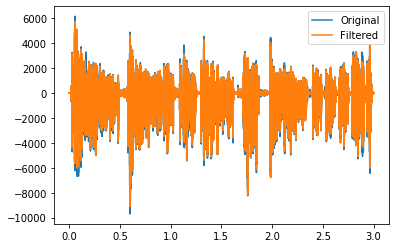

In [53]:
# Define filter cutoff frequency and degree
y=audio_arr
'''1024,    2560],
       [   9216, 1673176]'''
b, a = signal.butter(3, 1/10,'lowpass')

# Apply modeled filter to data
y_filtered_low = signal.filtfilt(b, a, y)
Fm = len(y)+1
total_seconds = 3
x = np.arange(0,total_seconds-total_seconds/Fm,total_seconds/Fm)
plt.plot(x,y)
plt.plot(x,y_filtered_low)
plt.legend(["Original","Filtered"])

In [54]:
low_filter = array.array('h')
low_filter.fromlist(list(map(int,y_filtered_low)))
audio_low=audio._spawn(data=low_filter)
len(audio_low)

34858

In [55]:
audio_low

In [47]:
audio_low.export("./output/vargas_low.wav", format="wav")

<_io.BufferedRandom name='./output/vargas_low.wav'>

In [48]:
sil_removal1 = logmmse_from_file('output/vargas_low.wav',noise_threshold=0.15,initial_noise=6,window_size=0)

In [49]:
sil_removal1

array([  0,   0,   0, ..., -10, -10,  -9], dtype=int16)

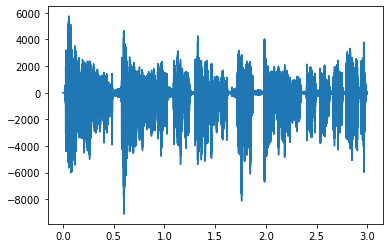

In [52]:
y=sil_removal1
Fm = len(y)+1
total_seconds = 3
x = np.arange(0,total_seconds-total_seconds/Fm,total_seconds/Fm)
plt.plot(x,y)

In [50]:
silence1 = array.array('h')
silence1.fromlist(list(map(int,sil_removal1)))
sil_1=audio._spawn(data=silence1)
print(len(sil_1))
sil_1

34830


In [44]:
import librosa
audio_arr=np.array(audio_arr)
audio_arr=audio_arr.astype("float32")
ys=librosa.effects.split(audio_arr, top_db=40, frame_length=2048, hop_length=512)

'''# Load some audio
>>> y, sr = librosa.load(librosa.util.example_audio_file())
>>> # Trim the beginning and ending silence
>>> yt, index = librosa.effects.trim(y)'''


'# Load some audio\n>>> y, sr = librosa.load(librosa.util.example_audio_file())\n>>> # Trim the beginning and ending silence\n>>> yt, index = librosa.effects.trim(y)'

In [45]:
len(ys)

13

1673176

In [ ]:
audio = AudioSegment.from_file("input/HAlbertoVargas.ogg",format='ogg')
audio_arr=audio.get_array_of_samples()
len(audio_arr)

In [ ]:
audio

In [40]:
y=audio_arr
Fm = len(y)+1
total_seconds = 3
x = np.arange(0,total_seconds-total_seconds/Fm,total_seconds/Fm)
f_osc = 1

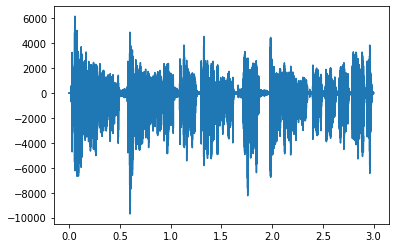

In [38]:
plt.plot(x,y)

In [4]:
import noisereduce as nr
# load data
#rate, data = wavfile.read("mywav.wav")
# select section of data that is noise
#noisy_part = data[10000:15000]
# perform noise reduction
#reduced_noise = nr.reduce_noise(audio_clip=audio, noise_clip=noisy_part, verbose=True)

/usr/local/lib/python3.7/site-packages/noisereduce/noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
def detect_leading_silence(sound, silence_threshold=-10.0, chunk_size=10):
    '''
    sound is a pydub.AudioSegment
    silence_threshold in dB
    chunk_size in ms
    iterate over chunks until you find the first one with sound
    '''
    trim_ms = 0  # ms
    while sound[trim_ms:trim_ms+chunk_size].dBFS < silence_threshold:
        trim_ms += chunk_size

    return trim_ms

import sys

sound = AudioSegment.from_file("input/HAlbertoVargas.ogg", format="ogg")

start_trim = detect_leading_silence(sound)
end_trim = detect_leading_silence(sound.reverse())

duration = len(sound)
trimmed_sound = sound[start_trim:duration-end_trim]
trimmed_sound.export("output/HAlbertoVargas.wav", format="wav")

In [45]:
from logmmse import logmmse_from_file
import array
low_filter = array.array('h')
low_filter.fromlist(list(map(int,audio_arr)))
audio_low=audio._spawn(data=low_filter)
audio_low.export("./input/audio_high2.wav", format="wav")
out = logmmse_from_file('input/audio_high2.wav',noise_threshold=0.85,initial_noise=2)
print(out)

[  0   0   0 ...  -9 -11 -13]


In [46]:
low_filter = array.array('h')
low_filter.fromlist(list(map(int,out)))
audio_low=audio._spawn(data=low_filter)
audio_low

In [34]:
len(out)

1671840

In [35]:
y=out
Fm = len(y)+1
total_seconds = 3
x = np.arange(0,total_seconds-total_seconds/Fm,total_seconds/Fm)
f_osc = 1

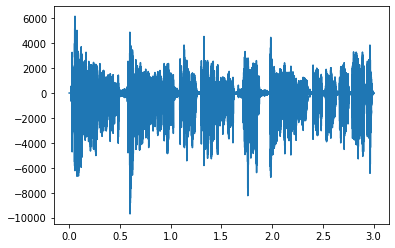

In [36]:
plt.plot(x,y)

/usr/local/Cellar/ipython/7.8.0/libexec/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/Cellar/ipython/7.8.0/libexec/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


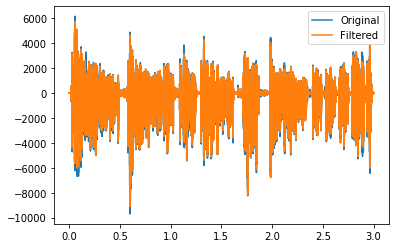

In [26]:
# Define filter cutoff frequency and degree
b, a = signal.butter(3, 1/10,'low')

# Apply modeled filter to data
y_filtered_low = signal.filtfilt(b, a, y)

plt.plot(x,y)
plt.plot(x,y_filtered_low)
plt.legend(["Original","Filtered"])

In [39]:
low_filter = array.array('h')
low_filter.fromlist(list(map(int,y_filtered_low)))
audio_low=audio._spawn(data=low_filter)
audio_low

NameError: name 'y_filtered_low' is not defined